## References

1. Robert Shumway and David Stoffer (2017). [Time Series Analysis and Its Applications: with R Examples](https://www.stat.pitt.edu/stoffer/tsa4/tsa4.htm), Springer, 4th edition.
2. http://www.stat.rice.edu/~dobelman/notes_papers/math/Riemann.Stiltjes.pdf
3. https://www.stat.berkeley.edu/~bartlett/courses/153-fall2010/lectures/15.pdf 
4. https://www.stat.berkeley.edu/~bartlett/courses/153-fall2010/lectures/16.pdf
5. Rajendra Bhatia, Positive Definite Matrices, Princeton University Press, 2007.

# 10 Spectral Analysis

We begin with a trignometric function where $t\in \mathbb Z$, 
$$x_t = A\cos(2\pi \omega t + \phi) = A\cos \phi \cos (2\pi \omega t) - A\sin\phi \sin(2\pi \omega t).$$

Parameter $\omega$ is the frequency, $A$ is the amplitude and  $\phi$ is the phase. Here $A$ and $\phi$ can be random variables.

Let $U_1 = A\cos\phi$ while $U_2 = -A\sin\phi$, we can show that the following two assumptions are equivalent:
1. $U_1,U_2$ are independently sampled from $N(0,1)$.
2. $A^2\sim \chi^2(2)$ and $\phi\sim U(-\pi,\pi)$ are independent.

And $x_t$ has the equivalent form that 
$$x_t = U_1\cos(2\pi \omega t)+U_2\sin(2\pi \omega t),$$
indicating that $x_t$ follows a sinusoidal pattern but its amplitude is not known in prior.

## Periodogram

### Real DFT

Given $n$ observations $x_t$ where $n$ is odd, we can decompose by  
$$x_t = a_0+\sum_{j=1}^{(n-1)/2}\left(a_j\cos\frac{2\pi jt}{n}+b_j\sin \frac{2\pi jt}{n}\right)$$
where
$$a_j = \frac 2n\sum_{k=1}^n x_t \cos\frac{2\pi j t}{n}\quad {\rm and}\quad 
b_j = \frac 2n\sum_{k=1}^n x_t\sin \frac{2\pi jt}{n}.$$

The **scaled** periodogram is defined by
$$P\left(\frac jn \right) = a_j^2+b_j^2.$$

Large $P(j/n)$ implies predominance while small ones are overshadowed  by the noise.


### Complex DFT

Let $d(j/n)$ be defined as follows,
$$d\left(\frac jn\right) = \frac{1}{\sqrt n}\sum_{t=1}^n x_te^{-\frac{2\pi ijt}{n}}$$
where $i^2=-1$. We call it the squared magnitude of the periodogram, 
$$\left|d\left(\frac jn\right) \right|^2 = \frac 1n\left(\sum_{t=1}^n x_t\cos \frac{2\pi jt}{n}\right)^2
+\frac 1n \left(\sum_{t=1}^n x_t \sin \frac{2\pi jt}{n}\right)^2.$$
It has the relation that $P(j/n) = \frac 4n|d(j/n)|^2$.

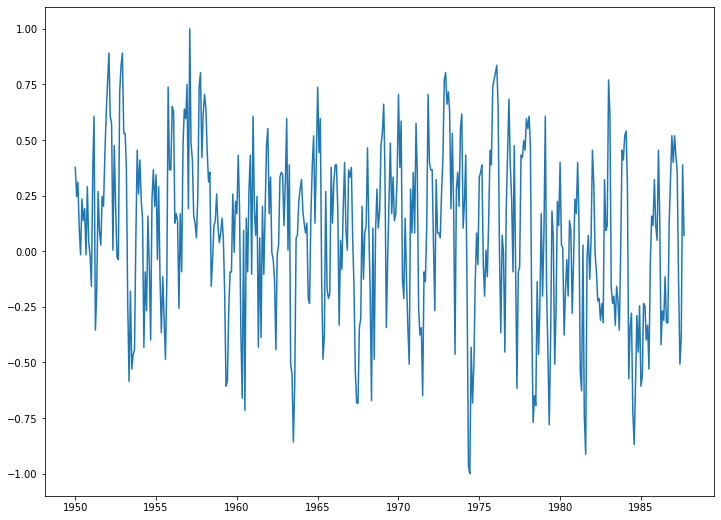

In [122]:
# analyze the SOI data
from astsadata import soi # pip install astsadata
import numpy as np 
from matplotlib import pyplot as plt 
plt.figure(figsize = (12,9))
x = np.array([i.start_time.asm8 for i in soi.index])
y = np.array(soi['value'])
plt.plot(x, y)

n = 453
index = [415  38   0  37 416]
value = [9.43536791 9.43536791 2.90192056 1.50804346 1.50804346]


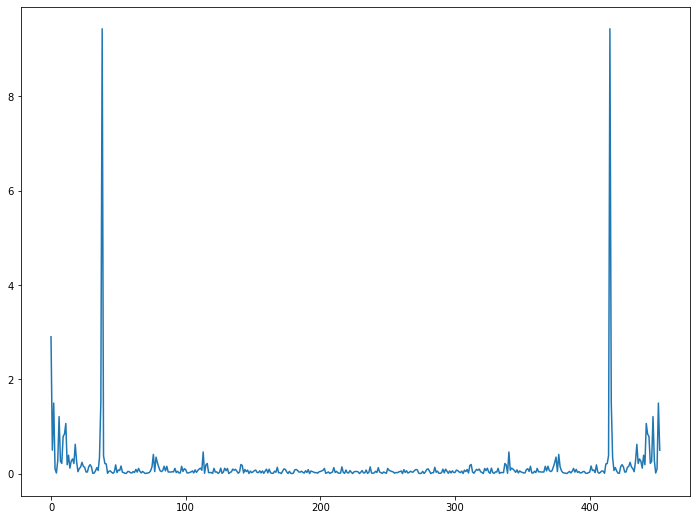

In [124]:
n = y.size 
squared_periodogram = np.abs(np.fft.fft(y))**2 / n # = np.abs(np.fft.fft(y) / n**0.5) ** 2
plt.figure(figsize = (12, 9))
argsort = np.argsort(squared_periodogram)[::-1][:5]
print('n = %d\nindex = %s\nvalue = %s'%(n, argsort, squared_periodogram[argsort]))
plt.plot(squared_periodogram)

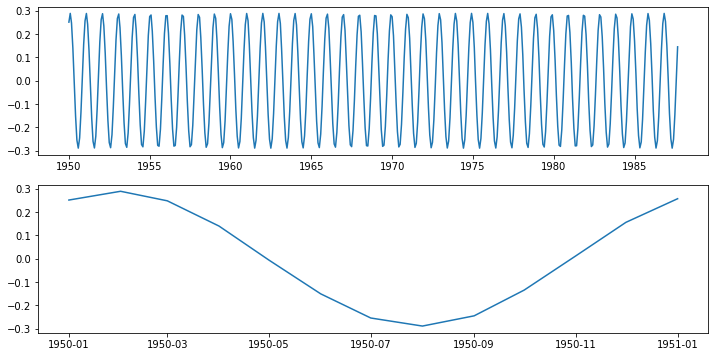

In [126]:
filter_fft = np.where(squared_periodogram < 3, 0, np.fft.fft(y))
filter_y = (np.fft.ifft(filter_fft)).real
plt.figure(figsize = (12, 6))
plt.subplot(2,1,1)
plt.plot(x, filter_y)
plt.subplot(2,1,2)
n2 = 13 # n / index = 453 / 38 = 11.92...
plt.plot(x[:n2], filter_y[:n2])

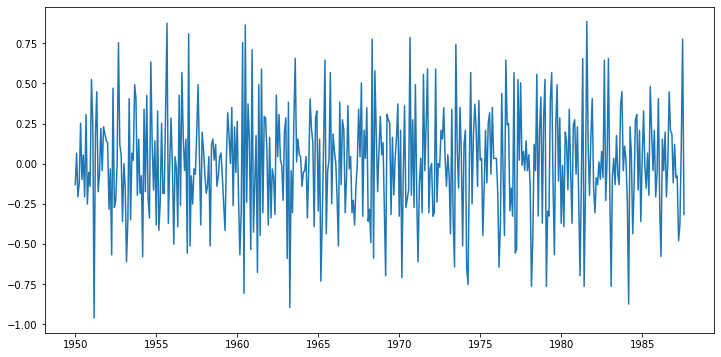

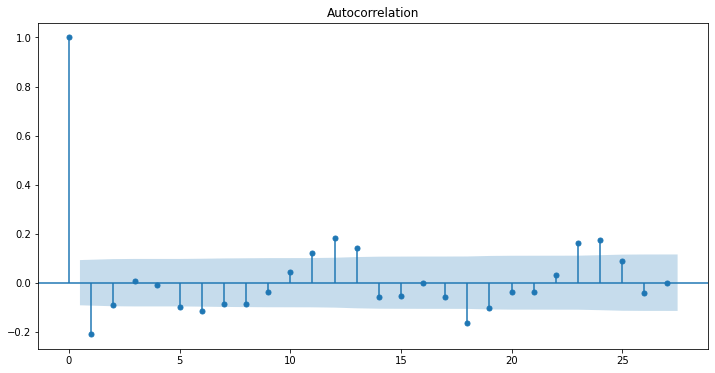

In [127]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plt.figure(figsize = (12, 9))
plt.rcParams['figure.figsize'] = [12 ,6]
mean = np.mean(y - filter_y)
s_var = np.var(y - filter_y, ddof = 1)
y2 = np.diff(y - filter_y)
y2 = np.diff(y)
plt.plot(x[:y2.size], y2)
plot_acf(y2, adjusted=True) # the ACF has a period of 12
# plot_pacf(y2)
plt.show()

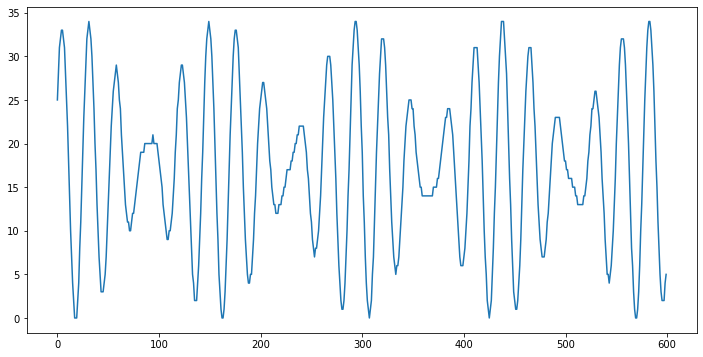

In [107]:
################################
#           STAR DATA
################################
from astsadata import star
y = np.array(star['value'])
n = y.size  
plt.plot(y)

n = 600
index = [  0  21 579  25 575]
value = [175719.70666667  11020.79969292  11020.79969292   9011.00184565
   9011.00184565]


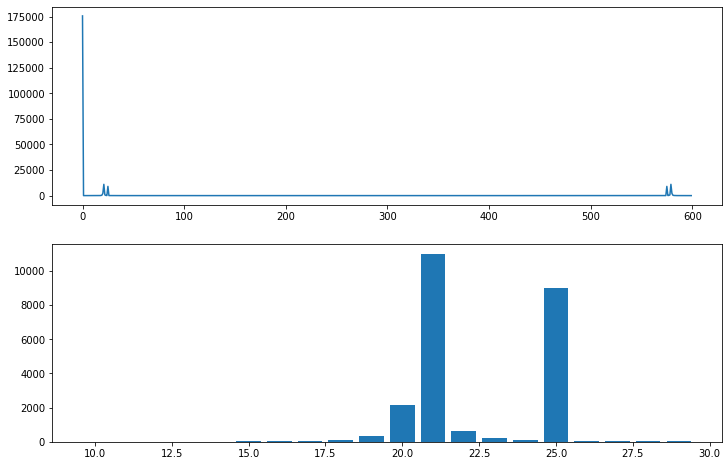

In [120]:
squared_periodogram = (np.abs(np.fft.fft(y))**2 / n) 
argsort = np.argsort(squared_periodogram)[::-1][:5]
print('n = %d\nindex = %s\nvalue = %s'%(n, argsort, squared_periodogram[argsort]))
plt.figure(figsize = (12, 8))
plt.subplot(2,1,1)
plt.plot(squared_periodogram)
plt.subplot(2,1,2)
plt.bar(np.arange(10, 30), squared_periodogram[10:30])
plt.show()
# period = n / index = 600/25, 600/21 = 24, 29

## Spectral Density

### Trignometry

Consider a simple (stationary) trignometric time series 
$$x_t = U_{1}\cos(2\pi \omega_0 t)+U_{2}\sin(2\pi\omega_0 t)$$ 
where $\omega_0$ is fixed while $U_{1},U_{2}\sim N(0,\sigma^2)$ are uncorrelated random variables. 

<font color=red>Since $t\in\mathbb Z$ is integer, we can without loss of generality assume $\omega_0\in [-\frac12,\frac12]$ by periodicity.</font>

The series has autocovariance given by 
$$\gamma(h) = \mathbb E(x_t x_{t+h})=\mathbb E(U_1^2\cos(2\pi \omega_0 t)\cos(2\pi \omega_0(t+h))
+U_2^2\sin(2\pi \omega_0 t)\sin(2\pi \omega_0(t+h)))
=\cos(2\pi \omega_0 h)\sigma^2.
$$

Also, it can be written in the form of 
$$\gamma(h) = \frac{\sigma^2}{2}e^{2\pi i|\omega_0| h}+\frac{\sigma^2}{2}e^{-2\pi i |\omega_0| h}
=\int_{-\frac12}^{\frac12} e^{2\pi i \omega  h}dF(\omega)$$
where $F$ has two jump discontinuities defined by 
$$F(\omega)=\left\{\begin{array}{ll} 0 & -1/2\leqslant \omega <-|\omega_0| \\   {\sigma^2}/{2} & -|\omega_0|\leqslant \omega \leqslant|\omega_0| 
\\ \sigma^2 & |\omega_0|  < \omega \leqslant 1/2\end{array}\right. .$$

The integral is Riemann-Stieljes integral, see introduction at [[2](http://www.stat.rice.edu/~dobelman/notes_papers/math/Riemann.Stiltjes.pdf)].

### Spectral Distribution Function 

If $\{x_t\}$ is a stationary series and has autocovariance $\gamma(h)$, then there exists a unique monotonically nondecreasing nonnegative function $F(\omega)$ over $\omega\in [-\frac12,\frac12]$ and $F(-\frac12)=0$, $F(\frac12)=\gamma(0)$ such that
$$\gamma(h)=\int_{-\frac12}^{\frac12}e^{2\pi i\omega h}dF(\omega).$$

* Herglotz's Theorem [5, p. 167]:
A complex-valued function $\gamma(h)$ defined on integers is nonnegative if and only if there exists 
$$\gamma(h) = \int_{-\frac12}^{\frac12}e^{2\pi i\omega h}dF(\omega)\quad h\in\mathbb Z$$
where $F$ is right-continuous, nondecreasing and bounded over $[-\frac12,\frac12]$ and $F(-\frac12)=0$.


### Spectral Density

If $\sum \gamma(h)$ absolutely converges, $\sum_{-\infty}^{+\infty}|\gamma(h)|<+\infty$, then there exists $f$ such that 
$$\gamma(h) = \int_{-\frac12}^{\frac12}e^{2\pi i\omega h}f(\omega)d\omega\quad h\in\mathbb Z$$
with its inverse given by discrete Fourier transform,
$$f(\omega) = \sum_{h=-\infty}^{+\infty}\gamma(h)e^{-2\pi i \omega h}\quad\omega \in[-\frac12,\frac12].$$
We shall also call the spectral density by spectrum.

### White Noise

White noise $w_t\sim N(0,\sigma_0^2)$ has spectral density given by (trivial from the formula above)
$$f(\omega) = \gamma(0)=\sigma_0^2.$$
It indicates that the spectral density is constant over all $\omega \in [-\frac 12,\frac12]$.

### Linear Filter
Suppose $\{x_t\}$ is stationary and has spectrum $f_X(\omega) $. If $y_t$ is obtained by a linear filter (called an impulse response function) on $x_t$,
$$y_t = \sum_{j=-\infty}^{+\infty}a_j x_{t-j}\quad{\rm where}\quad \sum_{j=-\infty}^{+\infty}|a_j|<+\infty,$$
and the corresponding frequency response function is defined by 
$A(\omega) = \sum_{j=-\infty}^{+\infty}a_je^{-2\pi i j\omega}$,
then $y_t$ has spectrum 
$$f_Y(\omega) = |A(\omega)^2|f_X(\omega).$$

Proof: First we compute the autocovariance of $y_t$, 
$$\gamma_Y(h) = {\rm Cov}(y_t,y_{t+h})=\sum_{j=-\infty}^{+\infty}\sum_{k=-\infty}^{+\infty}{\rm Cov}(a_jx_{t-j},a_kx_{t+h-k})= \sum_{r=-\infty}^{+\infty}\gamma_X(r)\sum_{j=-\infty}^{+\infty}a_ja_{j+h-r}.$$
The infinity sum is commutative by the absolute convergence of $\gamma_X$ and $a_j$. Also, it can be verified that $\gamma_Y(h)$ defined as above is absolutely summable.
Hence plug it into the formula of the spectral density and we have 
$$\begin{aligned}f_Y(\omega) &= \sum_{h=-\infty}^{+\infty}\gamma_Y(h)e^{-2\pi i\omega h } =\sum_{h=-\infty}^{+\infty}e^{-2\pi i\omega h } \sum_{r=-\infty}^{+\infty}\gamma_X(r)\sum_{j=-\infty}^{+\infty}a_ja_{j+h-r}\\
&= \sum_{r=-\infty}^{+\infty}\gamma_X(r)e^{-2\pi ir}\sum_{h=-\infty}^{+\infty}e^{-2\pi i\omega (h-r) } \sum_{j=-\infty}^{+\infty}a_ja_{j+h-r}\\
&= \sum_{r=-\infty}^{+\infty}\gamma_X(r)e^{-2\pi ir}\sum_{s=-\infty}^{+\infty}e^{-2\pi i s} \sum_{j=-\infty}^{+\infty}a_ja_{j+s}
\\ &= f_X(\omega)\cdot  A(\omega)\cdot \overline{A(\omega)}.
\end{aligned}
$$


#### ARMA 

If $x_t\sim {\rm ARMA}(p,q)$ where $\phi(B)x_t = \theta(B)\omega_t$ and $\phi(B)$ has no root with magnitude $1$, then it has spectral density given by 
$$f(\omega) = \sigma^2\left|\frac{\theta(e^{-2\pi i\omega})}{\phi(e^{-2\pi i\omega})}\right|^2.$$

Proof: In spite of the causality of the ARMA model, $x_t$ can be represented by a Laurent series of $w_t$ around the annulus containing the unit circle, 
$$x_t = \frac{\theta (B)}{\phi(B)}w_t = \sum_{j=-\infty}^{+\infty} \psi_j w_{t-j},$$
where $\sum_{j=-\infty}^{+\infty}|\psi_j|<+\infty$, 
which is a case of the linear filter illustrated above.

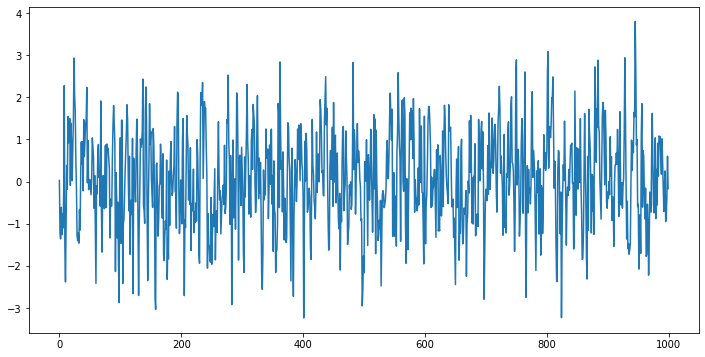

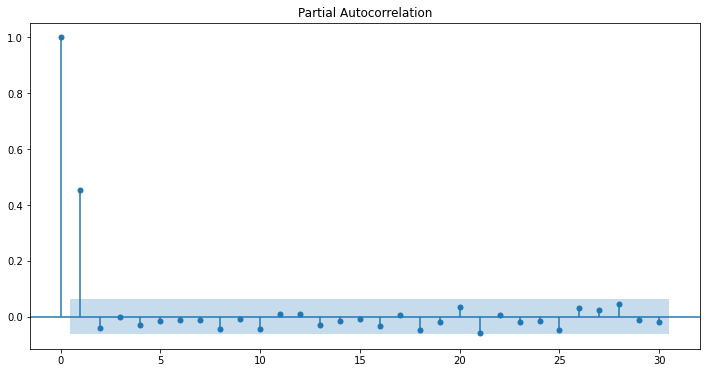

In [76]:
# check an AR model x = (.5)^j w_{t-j}
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt 
y = arma_generate_sample([1,-.5], [1], 1000)
plt.rcParams['figure.figsize'] = [12 ,6]
plt.plot(y)
# plot_acf(y)
plot_pacf(y)
plt.show()

from statsmodels.tsa.stattools import acf 
import numpy as np 
nlags = 254
# autocorrelation = autocovariance when gamma(0)=1
y_acf = acf(y, nlags = nlags, fft = True)


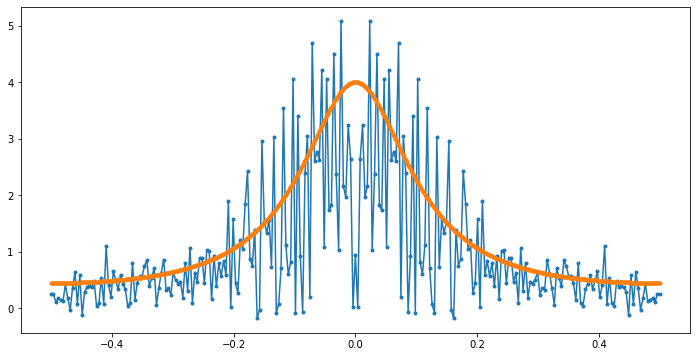

In [77]:
# when omega = k/n, 
# spectrum = sum gamma(h)*e^{-2*pi*i*(k/n)*h} = gamma(0) + sum_{h>=1} gamma(h) * 2cos(k*pi/n*h)
y_spectrum = np.fft.fft(y_acf).real * 2 - 1

# convert the range of omega from [0,1] to [-.5, .5]
y_spectrum = np.hstack([y_spectrum[nlags//2+1:], y_spectrum[:nlags//2+1]])

plt.plot(np.linspace(-.5,.5,y_spectrum.size), y_spectrum, '.-')
omegas = np.linspace(-.5, .5, 1000)
# spectrum for (1-.5B)x = w
y_spectrum2 = np.abs(1. / (1 - .5 * np.exp(omegas*np.pi*2*1j)))**2
plt.plot(omegas, y_spectrum2 , '.-')
plt.show()

### Spectral Representation

If $x_t$ is zero-mean and stationary with spectral distribution  function $F(\omega)$, then one can restore $x_t$ in the following manner: There exists a complex-valued stochastic process $Z(\omega)\ \omega\in [-\frac12,\frac12]$ having stationary uncorrelated non-overlapping increments such that 
$${\rm Var}(Z(\omega_2) - Z(\omega_1)) = F(\omega_2) - F(\omega_1)$$
and $x_t$ is given by a stochastic integral, 
$$x_t = \int_{-\frac12}^{\frac12}e^{2\pi i\omega t}dZ(\omega).$$

## Periodogram and DFT


### Principal Component Analysis

When $\sum |\gamma(h)|$ absolutely converges, recall the definition of the autocovariance matrix $\Gamma_n$ given by 
$$\Gamma_n =  \left[\begin{matrix}\gamma(0) & \gamma(-1) & \gamma(-2) & \dotsc & \gamma(1-n)\\ 
\gamma(1) & \gamma(0) & \gamma(-1) & \dotsc & \gamma(2-n)\\
\gamma(2) & \gamma(1) & \gamma(0) &\dotsc & \gamma(3-n)\\ 
\vdots &\vdots &\vdots &\ddots &\vdots\\ 
\gamma(n-1)&\gamma(n-2) &\gamma(n-3)&\dotsc & \gamma(0) 
\end{matrix}\right].
$$
Then, when $n\rightarrow +\infty$, if sorted properly, the eigenvalues $\lambda_j\ j=1,\dotsc,n-1$ have the following approximation
$$\lambda_j\approx \sum_{h=-\infty}^{+\infty}\gamma(h)e^{-\frac{2\pi ijh}{n}}.$$

<font color=red>**The proof in [1] is wrong.**</font> It states the proof as follows: when $n$ is odd, we recall that the eigenvalues of the following circulant matrix $A_n$  (which is also symmetric)  is easy to compute, 
$$A_n = [\gamma\left(\ \min\{|i-j|,n-|i-j|\}\ \right)]_{0\leqslant i,j<n}.$$

In [6]:
# For example, when n = 7, matrix A has the following form
import sympy as sp 
n = 7
A = sp.Matrix([[min(abs(i-j),n-abs(i-j)) for i in range(n)] for j in range(n)])
A

Matrix([
[0, 1, 2, 3, 3, 2, 1],
[1, 0, 1, 2, 3, 3, 2],
[2, 1, 0, 1, 2, 3, 3],
[3, 2, 1, 0, 1, 2, 3],
[3, 3, 2, 1, 0, 1, 2],
[2, 3, 3, 2, 1, 0, 1],
[1, 2, 3, 3, 2, 1, 0]])

The eigenvalues of $A_n$ are given by (well-known property of circulant matrices)
$$\lambda_j' = \sum_{h=0}^{n-1}\gamma(\min\{h,n-h\})e^{\frac{2\pi i jh}{n}} = \sum_{h=-\frac{n-1}{2}}^{\frac{n-1}{2}}\gamma(h)e^{-\frac{2\pi i jh}{n}}.$$
Thus, the eigenvalues of $A_n$ approximate the desired, 
$$|\lambda_j' - \sum_{h=-\infty}^{+\infty}\gamma(h)e^{-\frac{2\pi i jh}{n}}|\leqslant 2\sum_{h>\frac{n-1}{2}}|\gamma(h)|\rightarrow 0.$$
Yet in [1] it tries to show that $A_n - \Gamma_n$ converges to zero entrywise. However, it is not proper since two growing matrices with vanishing difference does not always imply convergence in eigenvalues. Also, Weyl's theorem fails as $\rho(A_n - \Gamma_n)$ does not necessarily (in fact, it does never) converge to zero.